## Einfaches Neuronales Netz
Dieses Notebook zeigt, wie man ohne spezielle ML-Frameworks ein einfaches künstliches neuronales Netz programmieren kann.

Es handelt sich dabei um ein Multilayer-Perzeptron mit einer inneren Schicht, d.h. das Netz hat eine Eingabeschicht, eine innere Schicht und eine Ausgabeschicht, die untereinander vollständig verbunden sind. 

Sämtliche Neuronen sind Sigmoid-Neuronen. 

Trainiert wird mit dem Batch-Verfahren bei fester Lernrate.

In [61]:
import numpy as np
import   matplotlib                 # https://matplotlib.org/3.1.1/tutorials/index.html
import   matplotlib.pyplot as plt   # https://matplotlib.org/tutorials/introductory/pyplot.html

Das neuronale Netz:

In [62]:
class ShallowNeuralNetwork (object):

    def __init__(self, inputLayerSize, hiddenLayerSize, outputLayerSize, activationFunction):
        self.inputLayerSize  = inputLayerSize
        self.hiddenLayerSize = hiddenLayerSize
        self.outputLayerSize = outputLayerSize
        
        self.W01 = 2 * np.random.random((inputLayerSize, hiddenLayerSize)) - 1
        self.W12 = 2 * np.random.random((hiddenLayerSize, outputLayerSize)) - 1

        if(activationFunction == 1):
            self.activationFunction = self.activationLogisticFunction
            self.activationFunctionDerivative = self.activationLogisticFunctionDerivative
        elif(activationFunction == 2):
            self.activationFunction = self.activationTanH
            self.activationFunctionDerivative = self.activationTanHDerivative
        elif(activationFunction == 3):
            self.activationFunction = self.activationReLu
            self.activationFunctionDerivative = self.activationReLuDerivative
        
        self.accuracy = []
        self.loss = []
        self.accuracyTest = []
        self.lossTest = []
        
        np.random.seed(1)

    def getLossList(self):
        return self.loss
    def getAccuracyList(self):
        return self.accuracy
    def getLossTestList(self):
        return self.lossTest
    def getAccuracyTestList(self):
        return self.accuracyTest

    def activationLogisticFunction(self, x):
        return 1 / (1 + np.exp(-x))
 
    def activationLogisticFunctionDerivative(self, x):
        return x * (1 - x)
    
    def activationTanH(self, x):
        return (np.tanh(x) + 1)/2

    def activationTanHDerivative(self, x):
        return (1-np.tanh(x)*np.tanh(x))/2
    
    def activationReLu(self, x):
        return np.maximum(0, x)
    
    def activationReLuDerivative(self, x):
        return np.where(x > 0, 1, 0)

    def getAccuracy(self, y, t):
        if(len(y.shape)==1):
            y = y.reshape(y.shape[0],1)
        if(len(t.shape)==1):
            t = t.reshape(t.shape[0],1)
        return np.count_nonzero(np.abs(y - t) <= 0.5) / y.shape[0]

    def getLoss(self, y, t):
        if(len(y.shape)==1):
            y = y.reshape(y.shape[0],1)
        if(len(t.shape)==1):
            t = t.reshape(t.shape[0],1)
        diff = y - t
        return np.mean(np.square(y-t))

    def predict(self, x):
        # forward propagation
        output0 = x
        output1 = self.activationFunction(np.matmul(output0, self.W01))
        output2 = self.activationFunction(np.matmul(output1, self.W12))
        return output2
        
    def train(self, x, y, epochs=100, eta=0.1, verbose=True):

        # Es wird eine 2D-Matrix erwartet. 
        # Ggf. muss ein Vektor in eine x1-Matrix konvertiert werden.
        if(len(y.shape)==1):
            y = y.reshape(y.shape[0],1)
        
        for iter in range(epochs):
           
            # forward propagation
            output0 = x
            output1 = self.activationFunction(np.matmul(output0, self.W01))
            output2 = self.activationFunction(np.matmul(output1, self.W12))

            self.accuracy.append(self.getAccuracy(y, output2))
            self.loss.append(self.getLoss(y, output2))


            predicted = a.predict(x_test)
            self.lossTest.append(a.getLoss(predicted,y_test))
            self.accuracyTest.append(a.getAccuracy(predicted,y_test))
            
            if(verbose):
                accuracy = self.getAccuracy(y, output2)
                loss = self.getLoss(y, output2)
                print('Epoch'+str(iter)+'/'+str(epochs)+': Accuracy '+str(accuracy)+', Loss '+str(loss))

            # backward propagation
            delta2 =         (output2 - y)         * self.activationFunctionDerivative(output2)        
            delta1 = np.matmul(delta2, self.W12.T) * self.activationFunctionDerivative(output1)

            # update weights
            self.W01 -= eta * np.matmul(output0.T, delta1)
            self.W12 -= eta * np.matmul(output1.T, delta2)
   

Um das Netz zu nutzen, benötigen wir zunächst einen Beispieldatensatz.

Es wird nun ein Beispieldatensatz für zwei nicht linear trennbare Klassen mit zwei Merkmalsdimensionen definiert: 

(sowohl Trainingsdaten (mit Labels) als auch Testdaten (mit Labels))

In [63]:
x_train = np.array(
[[-2.80797134e+00, -7.58843314e-01], [-1.42512390e+00, -7.10620507e+00], [ 1.33478941e+00,  4.41161975e+00], [-2.19602767e+00, -2.13238623e+00], [-1.50772322e-01, -6.05392622e+00], [-4.90909737e-01, -5.12885442e+00], [-2.05168024e+00, -4.71060031e+00], [-1.94499500e+00, -5.82325547e+00], [ 1.94832311e+00,  3.90799437e+00], [-7.40579725e-02, -3.18429302e+00], [ 2.07336073e+00,  4.46514442e+00], [-2.35937132e+00, -2.62210713e+00], [-3.14815292e+00, -2.24871560e+00], [-2.13584670e+00, -3.95837883e+00], [-1.82114798e+00, -4.79265209e+00], [ 1.45246538e+00,  5.06199535e+00],
 [-2.53446298e+00, -3.48478313e+00], [-9.22387664e-01, -5.21374717e+00], [ 4.06693367e-01,  5.89421151e+00], [ 5.93738587e-01,  3.86832692e+00], [-1.64259029e+00, -4.82114757e+00], [ 1.27481057e+00,  4.88880856e+00], [ 1.11207889e+00,  4.01795062e+00], [-9.86635064e-01, -4.63531967e+00], [-1.16847327e+00, -6.51338704e+00], [-1.06663965e+00, -5.72551518e+00], [ 2.13508742e+00,  5.10594719e+00], [-1.57039708e+00, -5.78211127e+00], [ 5.39672266e-01, -1.53263742e+00], [-1.76693030e+00, -4.20266075e+00], [-3.43037503e-01, -5.24123965e+00], [-3.48233368e-01,  2.76015642e+00],
 [-1.60170911e+00, -6.93724527e+00], [-2.46595521e+00, -3.03228278e+00], [-1.93826395e+00, -4.64041402e+00], [-2.28731354e+00, -3.59590111e+00], [-1.95830204e+00, -6.13436308e+00], [-1.84164325e+00, -5.36366252e+00], [-3.05165764e+00,  1.32476255e-01], [-1.57605097e+00, -5.49503136e+00], [-7.49625189e-01, -5.51990769e+00], [-7.32706374e-01, -6.90920874e+00], [-2.53665587e+00, -2.59346115e+00], [-8.10263910e-03, -4.48612810e+00], [-1.28356574e+00, -6.24303438e+00], [-1.52993588e+00, -5.92810468e+00], [-1.66023812e+00, -4.34180551e+00], [ 3.49876394e+00, -9.56846975e-01],
 [ 2.30454159e+00,  4.44475347e+00], [-3.61827231e-01, -4.79729585e+00], [-5.66370372e-01, -7.07574006e+00], [-1.91021682e+00, -5.12517247e+00], [-2.08942967e+00, -3.87290849e+00], [ 6.04078519e-01,  6.45002505e+00], [ 2.46266256e+00,  4.61257566e+00], [-3.52393325e-01, -5.59534052e+00], [ 1.60138078e+00,  5.47055184e+00], [ 2.46365658e+00,  2.98444843e+00], [-1.11697313e+00, -4.54499170e+00], [ 1.72542008e+00,  5.27085313e+00], [-2.08552175e+00, -2.83350097e+00], [-4.92433015e-01, -5.28276096e+00], [ 8.51026394e-01,  6.06365061e+00], [ 5.54474762e-01, -3.67517446e+00],
 [-1.87968896e+00, -5.09717886e+00], [ 2.01234965e-01, -3.90943212e+00], [ 4.15581437e-01,  5.26855190e+00], [-2.71297497e+00, -1.79023657e+00], [-2.12645655e+00, -5.54961816e+00], [-1.91607554e+00, -4.02914850e+00], [ 2.64285059e-01, -5.28906122e+00], [-3.69905799e+00,  2.71507104e+00], [-1.19994874e+00, -6.02349341e+00], [-1.08163808e+00, -4.76389215e+00], [ 4.12068747e-01, -3.63640379e+00], [ 2.20199828e-01,  5.34366763e+00], [-2.00966874e+00, -4.05679560e+00], [ 2.61496750e+00,  4.19383899e+00], [-5.36806903e-01, -7.24852722e+00], [ 1.38665174e+00,  5.67524269e+00],
 [-1.87302019e+00, -6.07014104e+00], [ 3.53590244e+00, -2.69892684e-01], [-2.66521800e+00, -3.15246803e+00], [ 1.41196390e+00,  6.07204597e+00], [-2.57252530e+00, -2.73712281e+00], [-2.26183469e+00, -4.86730504e+00], [-1.79915327e+00, -4.57586261e+00], [ 6.08748430e-01, -1.29836694e+00], [-2.76338094e+00, -3.71473687e+00], [-1.43528263e+00, -4.75353009e+00], [-1.63170556e+00, -2.92861529e+00], [ 3.22929780e-01,  3.40151855e+00], [-1.91787062e+00, -5.55439312e+00], [-2.57028829e+00, -3.14797625e+00], [-2.75834992e+00, -3.04199762e+00], [-1.93076974e+00, -3.68938296e+00],
 [-1.97287556e+00, -5.96057726e+00], [-1.94747327e+00, -4.41371149e+00], [-9.39081942e-01, -6.41794804e+00], [-8.52624884e-01, -4.09145498e+00], [-1.01048338e+00, -5.26109424e+00], [ 1.94811181e+00,  5.21187901e+00], [-3.52994507e+00,  1.50856864e+00], [-1.85410888e+00, -4.61791652e+00], [-9.98725151e-01, -6.28640115e+00], [-4.83004314e-01, -5.11960488e+00], [-3.00475234e-03, -4.33706281e+00], [ 1.18137530e+00,  5.74048014e+00], [-2.35860072e-02, -6.65010850e+00], [-2.03283196e+00, -4.73831213e+00], [-3.03042074e+00, -2.17209429e+00], [-3.67212271e+00,  1.83062702e+00],
 [-2.90522754e+00, -1.50024753e+00], [-1.76178170e+00, -5.75240216e+00], [-3.05378261e+00, -1.96482484e+00], [-1.18937618e+00, -5.58958386e+00], [ 8.33756201e-01,  6.26069327e+00], [ 1.05993522e-01, -4.51473175e+00], [-2.34519543e+00, -2.38029003e+00], [-1.42433522e-01, -4.85474905e+00], [-1.98430212e+00, -3.62107470e+00], [-2.39413697e+00, -2.62119057e+00], [-2.88718052e+00, -2.02194296e+00], [ 1.48824449e+00,  4.05351785e+00], [-3.32921963e+00,  1.59700824e-01], [-1.62071047e+00, -5.11181023e+00], [-2.38410555e+00, -4.88614667e+00], [-1.96313706e+00, -4.81403078e+00],
 [ 2.48165217e-02,  4.43763554e+00], [ 1.50427625e+00,  4.54735917e+00], [-3.11185464e+00, -3.17503529e-01], [-5.84623859e-01, -4.42031879e+00], [-1.83299406e+00, -6.04137089e+00], [ 2.48492851e+00,  3.04753346e+00], [-9.63235155e-01, -4.22209857e+00], [ 2.14340450e-02, -3.58542421e+00], [-1.46607120e+00, -5.01785768e+00], [-1.73531237e+00, -3.90444727e+00], [ 9.05728451e-01,  5.27525320e+00], [ 2.75560054e+00,  1.37120537e+00], [-3.02688637e+00, -1.59949473e-01], [-5.15370496e-01, -6.85220306e+00], [-1.54846434e+00, -6.44058113e+00], [-1.64461932e+00, -4.52929596e+00],
 [-1.63663810e+00, -6.45855995e+00], [ 1.23917272e+00,  5.18330870e+00], [-1.52723481e+00, -6.26716243e+00], [ 1.84978166e+00,  4.50934396e+00], [-1.65504982e+00, -2.95828761e+00], [-1.24392056e+00, -5.64726409e+00], [-1.01740205e+00, -6.60512952e+00], [-1.07924480e+00, -3.87692603e+00], [-2.38377132e+00, -3.28634192e+00], [ 7.32886904e-01,  7.12199930e+00], [ 1.38888931e-01, -5.24793019e+00], [-1.83505406e+00, -4.42201254e+00], [-1.73260288e+00, -4.16035635e+00], [-1.34907458e+00, -4.80839564e+00], [-1.42502658e+00, -3.84735079e+00], [ 3.51549801e+00, -1.19182448e+00],
 [-1.80061513e+00, -5.81804803e+00], [-2.31161001e+00, -4.35165916e+00], [-9.21589463e-01, -6.38998222e+00], [-1.66318358e+00, -4.78493867e+00], [ 2.65579165e+00,  1.64600536e+00], [ 9.21589304e-01, -2.48151185e+00], [ 5.80552816e-01,  5.63374354e+00], [ 9.66632544e-01,  5.68059181e+00], [-7.08661630e-01,  2.90480725e+00], [-7.06069591e-01, -4.80623876e+00], [ 2.58396014e+00,  5.15133970e+00], [ 9.20912784e-01,  4.64922677e+00], [-2.03670542e+00, -5.05861654e+00], [ 5.23196744e-01,  4.41982523e+00], [-5.44123353e-01, -5.03077445e+00], [-2.28827646e+00, -5.05831714e+00],
 [ 3.49313655e+00, -6.58048078e-01], [-4.19168759e-01,  3.00806548e+00], [-1.57974024e+00, -6.68464747e+00], [ 2.16793007e+00,  4.13100058e+00], [-1.72221948e+00, -4.07005934e+00], [-1.65860677e+00, -4.37093113e+00], [-1.61421826e+00, -5.31250310e+00], [-2.40866470e-01, -5.67569372e+00], [-1.78305287e+00, -6.17956561e+00], [-1.40326065e+00, -4.26787985e+00], [ 8.18598090e-01,  4.73308154e+00], [-4.46957624e-01, -4.56892594e+00], [ 7.41740568e-01,  5.02957799e+00], [-2.47538855e+00, -2.79713354e+00], [ 5.54113625e-01,  6.19309500e+00], [ 1.26401002e+00,  4.34748564e+00],
 [-1.87347646e+00, -6.05814546e+00], [-1.43846603e+00, -3.71406198e+00], [-2.41294542e+00, -3.60897531e+00], [-2.25103095e+00, -4.29388886e+00], [-1.26522872e+00, -3.95284012e+00], [-2.21664403e+00, -4.72843231e+00], [-2.37250244e+00, -4.71002750e+00], [-3.03470006e+00, -2.21125786e+00], [-1.60581327e+00, -5.09212490e+00], [-3.27550812e-01, -5.86941257e+00], [ 2.27993812e+00,  4.61859564e+00], [ 1.30425408e+00,  5.56590187e+00], [ 7.22791205e-01,  6.21229609e+00], [-5.86741147e-01, -4.38670398e+00], [ 1.76246770e+00,  5.54118046e+00], [-1.31883091e+00, -6.18988062e+00],
 [ 4.92204736e-01, -3.13243772e+00], [ 7.07559231e-01,  6.68158570e+00], [ 3.25075758e+00, -2.53175911e-01], [-9.84113281e-01, -6.26035237e+00], [ 2.06677565e+00,  5.04193351e+00], [-1.27217309e+00, -4.50206968e+00], [-3.04486021e+00, -8.39801591e-01], [-2.37416772e+00, -4.14259504e+00], [ 1.66043521e+00,  6.42527938e+00], [ 1.34393857e+00,  2.41902549e+00], [ 7.47730141e-01,  4.78034474e+00], [ 2.54361019e+00,  7.39918697e-01], [-1.48168274e+00, -5.39137725e+00], [ 2.96006421e-01,  4.74359298e+00], [ 2.27660361e+00,  4.08920465e+00], [ 1.87608578e+00,  4.66781801e+00],
 [ 9.45542461e-01,  4.96427547e+00], [-1.98798108e-01, -4.86217859e+00], [-5.41931482e-01, -3.58351139e+00], [-2.72602261e+00, -1.80827539e+00], [-2.57233211e+00, -4.53484733e+00], [-8.46620396e-02,  3.18802429e+00], [ 9.76627056e-01,  5.97638510e+00], [ 3.56122411e-03, -5.86003259e+00], [ 1.43260708e+00,  4.82767356e+00], [ 2.12873067e-01,  6.40685889e+00], [-4.56414136e+00,  7.31847392e+00], [ 1.18257284e+00,  5.29298688e+00], [-2.37724686e+00, -3.64735188e+00], [-3.04007907e+00, -9.17483991e-01], [-6.07411604e-01, -6.07790624e+00], [-3.50394177e+00,  6.39942666e-01],
 [-1.69850032e+00, -5.09270430e+00], [ 1.96424549e-01,  4.71567101e+00], [ 5.84122848e-01, -2.60981135e+00], [-2.58723367e+00, -1.84707582e+00], [-1.59034437e+00, -5.64026438e+00], [-1.22059865e+00, -5.33655242e+00], [-3.05859419e+00, -2.11170873e+00], [-3.47993430e-01, -4.89895954e+00], [ 8.61014046e-01,  4.46053026e+00], [ 2.92613072e-01, -4.46824795e+00], [-2.20339506e+00, -4.97634993e+00], [-2.10045054e+00, -5.20159537e+00], [-1.51500073e+00, -5.34300701e+00], [-9.18761728e-01, -6.68405158e+00], [-2.15382452e+00, -3.80922790e+00], [ 8.01352022e-01,  7.77715629e+00],
 [ 2.10207062e+00,  4.53906073e+00], [ 3.54115418e+00, -1.40616492e+00], [-2.95872474e-01, -6.94730384e+00], [ 3.06492877e+00,  2.83887056e-01], [ 3.64660772e-01,  6.36911970e+00], [ 2.48762071e+00,  2.62756581e+00], [-1.74302373e+00, -5.46923216e+00], [-9.41373796e-02,  4.00506436e+00], [ 3.31944884e+00, -1.33156837e-01], [ 2.90525766e+00,  1.12793667e+00], [ 5.18006342e-01,  4.82912012e+00], [ 5.72180147e-01,  3.35269072e+00], [-7.73320034e-01, -5.82057613e+00], [ 2.59330391e+00,  2.73693192e+00], [ 2.53503817e+00,  4.58240309e+00], [ 1.96184950e+00,  6.35316365e+00],
 [-2.80047378e+00, -1.75713777e+00], [-1.97525527e+00, -4.85551153e+00], [ 1.52591610e+00,  7.17760407e+00], [-1.31377625e+00, -5.40537441e+00], [ 1.54520647e+00,  4.85990359e+00], [-3.66492757e+00,  3.51366846e+00], [-1.80335111e+00, -6.28884070e+00], [-1.38847012e+00, -6.62025869e+00], [-1.43360730e+00, -4.77138248e+00], [ 2.81889683e+00,  1.34618790e+00], [-1.36890780e+00, -5.01482335e+00], [ 1.09593189e+00,  4.97836292e+00], [-3.79638200e-01, -4.25469679e+00], [-1.01308965e+00, -6.26416829e+00], [-1.21366890e+00, -6.01217956e+00], [-2.94875227e+00, -1.74374145e+00],
 [-2.41281010e+00, -2.36882624e+00], [-1.53770919e+00, -5.16560625e+00], [ 7.24793881e-01,  5.84238551e+00], [ 1.75659486e+00,  3.76289306e+00], [-2.88367860e+00, -2.81871014e+00], [-1.63369387e+00, -4.31364289e+00], [-1.25020753e+00, -6.59491303e+00], [ 2.41977397e+00,  1.78978185e+00], [ 1.18373072e+00,  6.08468425e+00], [-1.98427752e+00, -7.90948859e-01], [-1.59728090e-01, -6.43041713e+00], [ 1.95877498e+00,  3.85792786e+00], [-1.77548108e+00, -3.75957579e+00], [-2.64249579e-01,  3.89411261e+00], [-1.20526049e+00, -5.62653042e+00], [ 6.17200934e-01,  3.85353971e+00],
 [ 5.65604626e-01,  6.39427826e+00], [-7.45636930e-01, -6.01405336e+00], [ 2.48361966e-01, -3.46530859e+00], [-4.41871266e-01, -5.20955170e+00], [ 1.53233791e+00,  4.78583871e+00], [-1.53080131e+00, -3.63933606e+00], [-2.64219630e+00, -2.11777486e+00], [ 2.08665980e+00,  3.45812424e+00], [ 3.29711609e+00, -1.06286859e+00], [ 1.80936878e+00,  6.07859533e+00], [-7.83315690e-01, -5.64482475e+00], [-1.22286117e+00, -4.22242420e+00], [-2.59119056e+00, -3.70448975e+00], [-1.41959287e+00, -4.75642643e+00], [-2.20361498e+00, -4.84445630e+00], [-7.28664708e-01, -4.44273852e+00],
 [ 1.02726741e-01,  4.99003603e+00], [-4.08223480e+00,  4.52356163e+00], [ 7.40067897e-01,  6.89925845e+00], [ 1.40961975e+00,  5.05690338e+00], [ 1.15964504e+00,  5.93920793e+00], [-1.41656681e+00, -4.72607760e+00], [-3.27617344e+00,  5.92047973e-01], [-1.86583665e+00, -3.98582477e+00], [-2.20262028e+00, -5.76546933e+00], [-3.18861272e-01, -3.39491385e+00], [-3.36053074e+00, -1.22017126e+00], [ 1.40582684e+00,  6.38466490e+00], [-7.39748253e-01, -6.22933293e+00], [ 2.01758053e+00,  4.25309490e+00], [-3.67822510e+00,  1.35296708e+00], [ 5.14648874e-01, -2.61895404e+00],
 [-2.49910951e+00, -2.20665555e+00], [ 5.63185439e-01, -1.78178281e+00], [-2.08461084e+00, -4.98121547e+00], [ 1.87047685e+00,  5.79132341e+00], [-1.47078421e+00, -6.28405155e+00], [-2.37523939e+00, -3.28789786e+00], [-2.06362206e+00, -4.57309293e+00], [ 6.48178243e-01, -2.41528899e+00], [ 3.09676767e-01,  4.58553570e+00], [ 8.97020982e-01,  6.83857053e+00], [ 2.04697191e+00,  4.66610369e+00], [-1.94662665e+00, -4.80680649e+00], [-1.34009826e+00, -5.60694559e+00], [-8.10407183e-01, -5.71185207e+00], [-4.16048022e-01, -5.17209550e+00], [ 2.09467626e+00,  5.55307465e+00],
 [ 2.26938362e+00,  4.14297593e+00], [-2.97940649e-01, -6.27898625e+00], [-4.59847261e-01, -5.29999921e+00], [-2.33144508e+00, -5.04634523e+00], [-9.51004875e-01, -7.40383232e+00], [ 1.96151297e+00,  5.01585474e+00], [ 1.66312501e+00,  4.47908028e+00], [-2.11464092e+00, -4.13723318e+00], [ 2.71784605e+00,  2.49131285e+00], [-8.91644623e-01, -5.83995099e+00], [ 1.13133431e+00,  5.37811898e+00], [-1.84428915e+00, -4.84799331e+00], [ 1.69502088e+00,  6.99119374e+00], [-2.99916286e+00, -1.07049562e+00], [-3.58834704e+00,  2.35792220e+00], [ 2.90997114e+00,  1.82148496e+00],
 [ 1.02786408e+00,  6.13595862e+00], [-3.37411453e-01, -6.43182997e+00], [ 5.93233623e-01,  5.18598456e+00], [ 1.65118582e+00,  4.06426108e+00], [-9.60746177e-01, -6.70293657e+00], [-8.81893936e-02, -3.66460501e+00], [-1.39619232e+00, -5.19334412e+00], [-1.63763282e-01, -3.14253590e+00], [-8.87341513e-01, -6.64992950e+00], [-1.37974985e+00, -4.53577014e+00], [-2.33449834e+00, -4.92498110e+00], [-1.49422161e+00, -5.14338116e+00], [ 1.12217021e+00,  4.25477510e+00], [-3.68242540e+00,  1.79526747e+00], [-1.70567772e+00, -4.98626970e+00], [-1.33256675e+00, -4.36364981e+00],
 [-9.41067264e-01, -5.54222686e+00], [-1.41088247e+00, -5.22581820e+00], [-1.63296578e+00, -3.77734053e+00], [ 3.41223829e+00,  1.08260264e+00], [ 9.76369628e-02, -3.72153975e+00], [-8.69358327e-01, -4.32474590e+00], [-3.51835505e+00,  2.28124757e+00], [-2.66646415e+00, -3.70563621e+00], [-4.63757224e-01, -6.36815964e+00], [ 9.69078787e-01,  4.07171449e+00], [ 2.14959355e+00,  4.76751483e+00], [-8.27971432e-01, -4.57408452e+00], [ 1.15827478e+00,  7.05631710e+00], [ 1.10204023e-01, -3.64495210e+00], [-3.85686491e+00,  1.76188961e+00], [ 2.56003426e+00,  3.84399072e+00],
 [-1.24394761e+00, -6.15572170e+00], [-2.75052986e-01, -3.86571390e+00], [-1.42574932e+00, -6.37196449e+00], [ 1.50061301e+00,  4.84262689e+00], [-3.37542613e-01, -5.52544431e+00], [-1.42027804e+00, -6.32010614e+00], [-1.96098237e+00, -3.40817471e+00], [-9.62034793e-02,  4.64331205e+00], [ 1.76413894e+00,  5.67675384e+00], [-3.02959798e+00, -1.00797156e+00], [-1.02730968e+00, -4.89480710e+00], [-1.47386802e+00, -4.74623779e+00], [ 1.33461810e+00,  4.14357167e+00], [ 1.12542389e+00,  4.03293373e+00], [ 4.27638129e-01,  4.81338535e+00], [-2.74230051e+00, -1.94711662e+00],
 [-1.17923802e+00, -3.54925421e+00], [ 7.57658426e-01,  6.57254177e+00], [ 2.29286373e+00,  2.86456644e+00], [-1.69311226e+00, -6.22248540e+00], [-1.00923862e+00, -5.00626541e+00], [-1.61854175e+00, -4.25580987e+00], [-1.60423393e+00, -3.27008602e+00], [-2.59750980e+00, -2.04004034e+00], [-5.09013829e-01, -3.99206602e+00], [-1.62525424e+00, -5.52205147e+00], [-2.40675064e-01,  3.41415628e+00], [-2.08513528e+00, -3.49012961e+00], [ 8.70825219e-02, -3.65187053e+00], [-2.22598006e+00, -3.01754792e+00], [ 3.03753484e+00,  5.71632487e-01], [-5.21672457e-01, -5.49317166e+00],
 [-1.22287350e+00, -5.30004710e+00], [ 2.03579566e+00,  5.28472767e+00], [ 1.77868135e+00,  5.51566751e+00], [ 1.38407485e-02, -5.82739840e+00], [ 2.99211811e-01, -4.04745963e+00], [-2.27103851e+00, -4.42870701e+00], [-2.54096285e+00, -5.15760083e+00], [-6.84010846e-01, -5.55379818e+00], [ 2.33845029e+00,  5.01438377e+00], [-2.06282904e+00, -5.62189383e+00], [-2.01428378e-01, -6.75856130e+00], [ 2.45821282e+00,  4.25663711e+00], [-1.02482261e+00, -5.24560903e+00], [ 1.64479311e+00,  5.25646683e+00], [-1.10192821e+00, -6.28504957e+00], [ 1.01633527e+00,  6.82249558e+00],
 [-9.59694484e-01, -6.00563267e+00], [-3.71621458e-01, -6.32849098e+00], [-1.95350312e+00, -5.41173717e+00], [ 5.59781095e-01,  6.71750078e+00], [-6.15852205e-01, -4.88921325e+00], [-9.34026795e-01, -6.18380684e+00], [ 1.02465948e+00,  3.74867011e+00], [ 2.19130854e+00,  3.82759442e+00], [-1.76308125e+00, -6.01805340e+00], [-2.32482759e+00, -3.21998090e+00], [ 1.54538256e+00,  7.65547773e+00], [ 9.67711820e-01,  5.81654680e+00], [-5.82252888e-01, -5.96912152e+00], [ 8.06927274e-01, -3.18376308e+00], [ 7.33773809e-01,  6.50458343e+00], [ 1.30504439e+00,  6.55445798e+00],
 [-2.45151246e-01, -4.95130718e+00], [ 5.23081747e-03,  4.60772012e+00], [-3.12435896e+00, -1.83021633e+00], [-1.89216898e+00, -3.32253510e+00], [ 1.22946214e+00, -6.43655655e-01], [-1.18198314e+00, -4.21676991e+00], [-2.64130832e+00, -3.12171020e+00], [-8.30407304e-01, -5.11810506e+00], [ 1.58432253e+00,  6.13596789e+00], [-1.39581002e+00, -4.63045713e+00], [ 2.21842096e+00,  3.94097328e+00], [ 5.89740917e-01, -2.49538716e+00], [ 9.06876434e-01,  6.52751657e+00], [ 2.05087565e+00,  4.71312654e+00], [-2.33867741e+00, -4.91704326e+00], [-3.06577484e+00, -1.44045413e+00],
 [-6.67181256e-01, -4.77245112e+00], [-8.23718489e-01, -4.55683797e+00], [ 2.35882315e+00,  4.33687036e+00], [ 1.73558565e+00,  5.85017139e+00], [-1.25032899e+00, -6.10049123e+00], [-3.86047258e-01, -6.00091357e+00], [-9.37458216e-01, -3.81732813e+00], [-2.71522542e+00, -3.10932491e+00], [ 2.26815848e+00,  4.95204790e+00], [-1.23931152e+00, -4.94241048e+00], [-2.23280744e+00, -4.49266845e+00], [-1.25758925e+00, -5.11968604e+00], [-2.61137293e+00, -6.01842770e-01], [-1.73344105e+00, -4.87394452e+00], [-2.12806901e+00, -4.48615574e+00], [-2.40428864e+00, -1.89973471e+00],
 [-3.34718751e+00, -1.75660153e-01], [-8.38885537e-01, -7.07125637e+00], [-1.03898404e+00, -4.18197384e+00], [-1.20363033e+00, -5.45852718e+00]])

In [64]:
y_train = np.array(
[0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,
 0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,
 0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,
 1,1,1,0,0,0,0,1,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,
 1,0,0,1,0,1,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,
 1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,
 0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0])

In [65]:
x_test = np.array(
[[-1.90050736, -4.97696461], [-0.17108768, -5.94796257], [-2.08249357, -4.26336643], [-1.57262009, -4.01577709],
 [-1.80333372, -4.50817295], [ 1.4672417 ,  6.13556627], [-1.8073934 , -4.87686   ], [-2.29903587, -1.21625223],
 [-1.27655354, -4.37795076], [-0.16577009,  2.13660348], [-3.3031044 , -0.8367245 ], [-2.90127391, -2.37580152],
 [-1.8565606 , -6.23809063], [ 0.38966212,  3.8527293 ], [-2.20721776, -3.36211723], [ 0.64594916,  4.71309223],
 [-2.85810146,  0.39791908], [ 0.58721374, -3.46998792], [-1.96318414, -5.90304554], [-0.88516423, -5.49000532],
 [-1.01799381, -5.92077745], [-2.76234688, -3.35505383], [-2.11727487, -4.10246948], [-1.72756029, -4.19173019],
 [ 0.82183677,  4.53423592], [ 1.20338588,  3.60266326], [ 0.64398591, -3.28870132], [-2.55760927, -2.30690489],
 [ 0.91265695,  4.68984451], [ 1.99776365,  5.52876811], [ 1.65664848,  3.33225614], [-1.70218764, -4.31085015],
 [-2.06290406, -5.24998116], [-2.30052384, -6.06021818], [-2.15548163, -3.28142001], [-1.45667955, -6.13745134],
 [-1.55358867, -4.93372604], [-0.66766765, -6.12088843], [-1.50758708, -4.9094681 ], [ 0.44652405,  6.44434243],
 [-1.8058143 , -6.64950178], [-2.3396497 , -3.36820445], [ 0.2092077 , -4.27600176], [-1.90159445, -5.68658974],
 [-2.8667897 , -2.87681213], [-0.87928249, -7.58129399], [ 1.70605839,  5.68463959], [ 2.54550908,  2.873518  ],
 [-2.29226631, -4.91765058], [-2.08357615, -5.87034987], [-3.14461881, -1.69727258], [-2.64517011, -1.90229412],
 [-1.58191281, -6.32543404], [ 1.60602887,  4.43159608], [-0.92359811, -3.77950766], [-2.30265172, -2.52016604],
 [ 1.86910331,  4.66831881], [-2.35844888, -4.69278695], [-0.31677792,  1.87480857], [ 1.20412635,  4.62397609],
 [-1.28521802, -3.83667087], [-3.28078792,  1.33214567], [ 3.18012101, -0.8519784 ], [ 0.63991844, -4.06378676],
 [-2.2088275 , -4.05104378], [ 0.66535409,  7.55719056], [-1.65703548, -4.40209324], [-0.71435109, -4.76820999],
 [-1.95252481, -5.00365334], [-2.06393527, -1.83891384], [-2.53072401, -2.91430982], [-1.81701145, -4.99622775],
 [-1.17892713, -6.0496607 ], [-1.46240787, -5.73519315], [-0.76670555, -5.84622606], [-1.44240121, -5.29906723],
 [ 0.38496533, -1.72792592], [-2.6993958 , -3.41056923], [-2.96111949, -2.04298393], [ 1.62775302,  5.8373843 ],
 [-1.1881251 , -6.01475317], [-1.59096474, -7.05347748], [-0.89996776, -6.5001322 ], [-1.98908438, -3.94300742],
 [ 2.96831866,  0.6350904 ], [-1.26776652, -5.20695251], [ 2.94026512,  3.10712264], [-1.46552552, -5.61876658],
 [ 2.11604246,  4.41356726], [-2.43066865, -3.63664168], [-0.99798103, -6.42763328], [-2.37837907, -3.75859623],
 [ 2.00145615,  4.61603806], [-1.47623086, -7.04042626], [ 0.04142951, -4.6594091 ], [-1.46328767, -6.52724447],
 [ 1.80065344,  5.20591344], [-2.58535345, -3.26279545], [-3.0973105 ,  1.12253213], [ 1.33299419,  4.95479179]])

In [66]:
y_test = np.array(
[0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,
 0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,
 0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1])

In [67]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(500, 2) (500,)
(100, 2) (100,)


Man kann sich die Daten auch anschauen:

Legende:
- Grüne Kreise: Trainingsdatenpunkte von Klasse 0
- Rote Quadrate: Trainingsdatenpunkte von Klasse 1
- Gelbe Kreise: Testdatenpunkte von Klasse 0
- Magenta Quadrate: Testdatenpunkte von Klasse 1


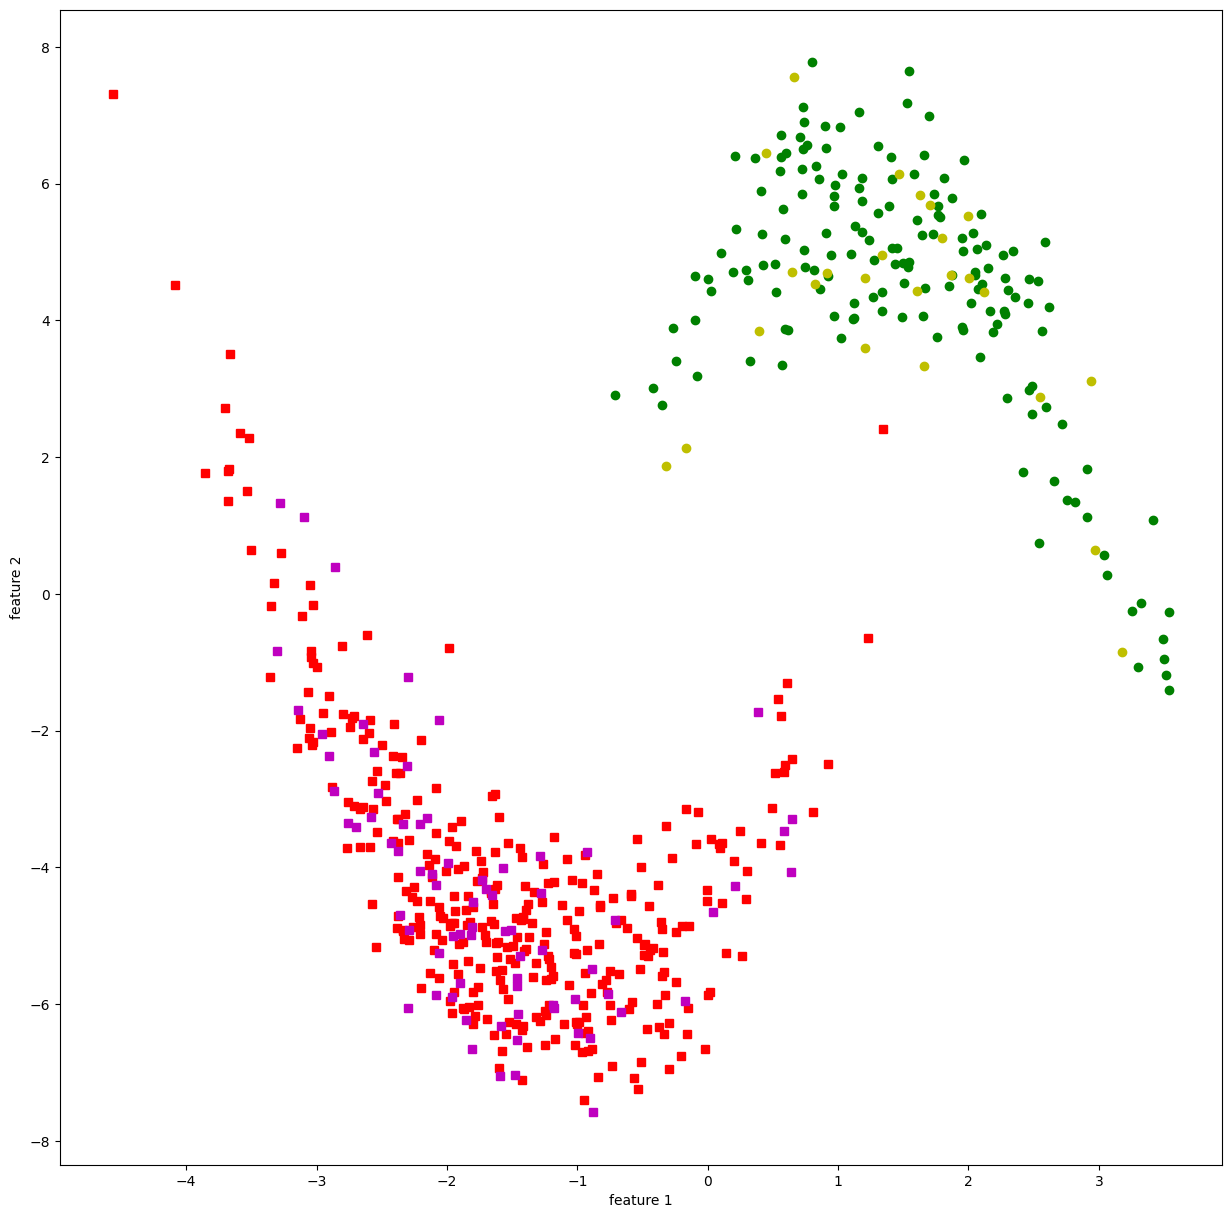

In [68]:
fig = plt.figure(figsize=(15,15))
plt.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'rs')
plt.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'go')
plt.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'ms')
plt.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'yo')
plt.xlabel("feature 1")
plt.ylabel("feature 2");

Nun können wir eine Instanz des neuronalen Netzes erstellen Als Parameter übergeben wir die Breite der Eingabeschicht (d.h. 2 für die zweidimensionalen Eingangsdaten), die Breite der inneren Schicht (hier 100) und die Breite der Ausgabeschicht (bei der binären Klassifikation reicht ein Ausgabeneuron).

In [69]:
#Definition des Netzes
a=ShallowNeuralNetwork(2,100,1,1)

Nun kann das Netz auf den Trainingsdaten trainiert werden. Wir trainieren über 100 Epochen mit einer Lernrate von eta=0.02.

In [70]:
#Trainieren des Netzes
a.train(x_train,y_train,epochs=100,eta=0.02,verbose=True)

Epoch0/100: Accuracy 0.322, Loss 0.6655952760853157
Epoch1/100: Accuracy 0.322, Loss 0.5013494476783809
Epoch2/100: Accuracy 0.956, Loss 0.043339164414795094
Epoch3/100: Accuracy 0.96, Loss 0.03905093993750266
Epoch4/100: Accuracy 0.96, Loss 0.03812985594593197
Epoch5/100: Accuracy 0.96, Loss 0.03731571796930991
Epoch6/100: Accuracy 0.96, Loss 0.03638341457947013
Epoch7/100: Accuracy 0.96, Loss 0.03521292998544112
Epoch8/100: Accuracy 0.964, Loss 0.03377303354190721
Epoch9/100: Accuracy 0.966, Loss 0.03215478166032324
Epoch10/100: Accuracy 0.966, Loss 0.030486558884633197
Epoch11/100: Accuracy 0.97, Loss 0.028872451185784503
Epoch12/100: Accuracy 0.97, Loss 0.027420073435954605
Epoch13/100: Accuracy 0.974, Loss 0.026189185422743927
Epoch14/100: Accuracy 0.974, Loss 0.02514781477552563
Epoch15/100: Accuracy 0.974, Loss 0.024221155446972845
Epoch16/100: Accuracy 0.974, Loss 0.023348623860176644
Epoch17/100: Accuracy 0.976, Loss 0.022498331813700666
Epoch18/100: Accuracy 0.978, Loss 0.021

Schließlich testen wir das Netz durch Verwenden der Testdaten:

In [71]:
#Testen des Netzes
predicted = a.predict(x_test)
print("Loss:" , a.getLoss(predicted,y_test))
print("Accuracy:" , a.getAccuracy(predicted,y_test))

Loss: 0.00013323346733056876
Accuracy: 1.0


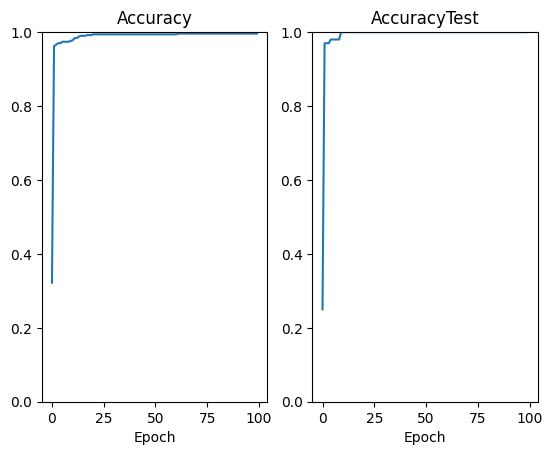

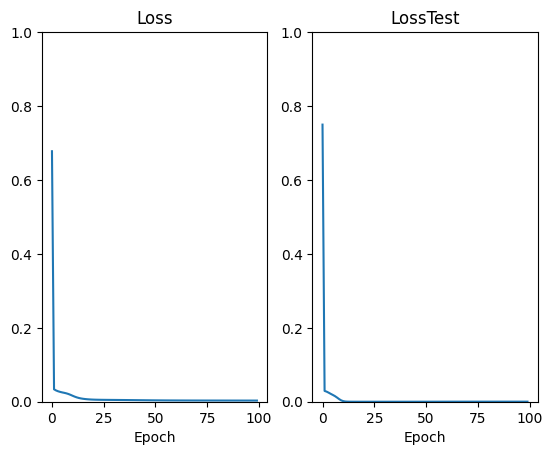

In [72]:
#Definition des Netzes
a=ShallowNeuralNetwork(2,100,1,2)

#Trainieren des Netzes
#verbose auf "False" gesetzt :während des Trainings keine Ausgabe angezeigt wird
a.train(x_train,y_train,epochs=100,eta=0.002,verbose=False) # Logistic

plt.subplot(1, 2, 1) # 1 Zeile und 2 Spalte
plt.ylim(0, 1) #y-Achse von 0 bis 1
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.plot(a.getAccuracyList());
plt.subplot(1, 2, 2)
plt.ylim(0, 1)
plt.title("AccuracyTest")
plt.xlabel("Epoch")
plt.plot(a.getAccuracyTestList());
plt.show()

plt.subplot(1, 2, 1)
plt.ylim(0, 1)
plt.title("Loss")
plt.xlabel("Epoch")
plt.plot(a.getLossList());
plt.subplot(1, 2, 2)
plt.ylim(0, 1)
plt.title("LossTest")
plt.xlabel("Epoch")
plt.plot(a.getLossTestList());
plt.show()